# lifelines

*lifelines* implements methods and algorithm for life insurance. As many dedicated module, it contains custom graphs built on the top of [matplotlib](http://matplotlib.org/) for this module.

[documentation](http://lifelines.readthedocs.io/en/latest/) [source](https://github.com/CamDavidsonPilon/lifelines) [installation](https://pypi.python.org/pypi/lifelinesl) [tutorial](http://lifelines.readthedocs.io/en/latest/Examples.html) 

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## example

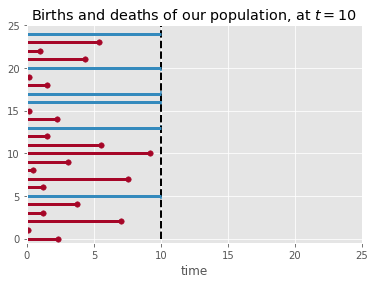

Observed lifetimes at time 10:
 [ 10.           5.39173892   0.96070227   4.30409009  10.           0.16092116
   1.51180601  10.          10.           0.13168284   2.24095861  10.
   1.48363817   5.53642893   9.16920642   3.04028587   0.42805536
   7.51075415   1.18884195  10.           3.72807581   1.18750325
   7.0485026    0.08488696   2.29143555]


In [4]:
from lifelines.plotting import plot_lifetimes
from numpy.random import uniform, exponential
from numpy import array, minimum
import matplotlib.pyplot as plt

N = 25
current_time = 10
actual_lifetimes = array([[exponential(12), exponential(2)][uniform()<0.5] for i in range(N)])
observed_lifetimes = minimum(actual_lifetimes,current_time)
observed = actual_lifetimes < current_time

plt.xlim(0,25)
plt.vlines(10,0,30,lw=2, linestyles="--")
plt.xlabel('time')
plt.title('Births and deaths of our population, at $t=10$')
plot_lifetimes(observed_lifetimes, event_observed=observed)
print("Observed lifetimes at time %d:\n"%(current_time), observed_lifetimes)

Text(0.5,1,'Survival function of political regimes')

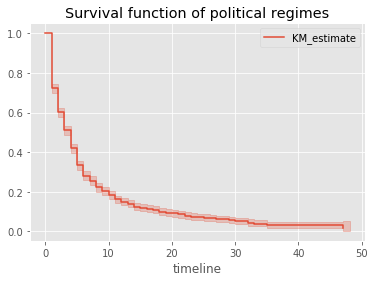

In [5]:
import lifelines.datasets
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

data = lifelines.datasets.load_dd()
T = data["duration"]
C = data["observed"]
kmf.fit(T, event_observed=C )

kmf.plot()
plt.title('Survival function of political regimes')